# First check which genes are in the all reps.txt not in any of protien coding, ncrna

In [102]:
import pandas as pd
import geneTSmunging as gtm
all_data = pd.read_csv("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps.txt", sep='\t')

n_data = pd.read_csv("../data/GeneExpressionData/featurecounts.genes.TPM.selected_reps.ln.surrogate_variables_corrected.ncrna.txt", sep='\t')
p_data = pd.read_csv("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps.ln.surrogate_variables_corrected.protein_coding.txt", sep='\t')

all_genes = set(all_data["gene"])
n_genes = set(n_data["gene"])
p_genes = set(p_data["gene"])
np_genes = n_genes.union(p_genes)

print "Number all genes ", len(all_genes)
print "Number ncrna", len(n_genes)
print "number protein-coding", len(p_genes)
print "number both", len(np_genes)
print "Number neither", len(all_genes.difference(set.union(n_genes, p_genes)))

Number all genes  60483
Number ncrna 8141
number protein-coding 17692
number both 25833
Number neither 34650


In [103]:
none_genes = all_genes.difference(set.union(n_genes, p_genes))

In [104]:
none_series = pd.Series(list(none_genes))

none_df = none_series.to_frame(name="None-Genes")

none_df.to_csv("../data/GeneExpressionData/DESeq-processing/none-genes.txt", sep="\t", index=False, header=False)
    

In [113]:
lim_data = all_data[all_data["gene"].isin(np_genes)]
#print lim_data.sum(axis=1)
lim_data = lim_data[lim_data.sum(axis=1) > 1]
#print lim_data.sum(axis=1)
lim_data.to_csv("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited.txt", sep="\t", index=False, header=True)
print lim_data.shape

(24205, 47)


# geneerate randomized data

In [106]:

lim_data = gtm.load_file_and_avg("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited.txt")
rand_lim_data = gtm.make_and_save_randomized_data(lim_data, filename="../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited-randomized.txt")

['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']
t00 has 4 data points
t05 has 4 data points
t1_ has 4 data points
t2_ has 4 data points
t3_ has 4 data points
t4_ has 4 data points
t5_ has 3 data points
t6_ has 3 data points
t7_ has 4 data points
t8_ has 4 data points
t10_ has 4 data points
t12_ has 4 data points
Randomized written to  ../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited-randomized.txt


# Make pairs to run DESeq

In [114]:
lim_data = pd.read_csv("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited.txt", sep="\t")

coldata = pd.read_csv("../data/GeneExpressionData/DESeq-processing/colData.txt", sep="\t")

coldata.columns = ["rep", "time"]

import collections

timeToRep = collections.OrderedDict()
for i, row in coldata.iterrows():
    print row
    if row["time"] not in timeToRep:
        timeToRep[row["time"]] = []
    timeToRep[row["time"]].append(row["rep"])

print timeToRep

In [117]:
firstkeys = timeToRep.keys()[:-1]
secondkeys = timeToRep.keys()[1:]
keypairs = zip(firstkeys, secondkeys)

In [118]:
import csv
!mkdir "../data/GeneExpressionData/DESeq-processing"
for i, keypair in zip(range(len(keypairs)), keypairs):
    firstkey, secondkey = keypair
    
    col_filename = "../data/GeneExpressionData/DESeq-processing/colData-pair-" + str(i) + ".txt"
    
    with open(col_filename, 'w') as csvfile:
        writer = csv.writer(csvfile, delimiter='\t')
        writer.writerow(["rep", "time"])
        for rep in timeToRep[firstkey]:
            writer.writerow([rep, firstkey])
        for rep in timeToRep[secondkey]:
            writer.writerow([rep, secondkey])

    data_filename = "../data/GeneExpressionData/DESeq-processing/featurecounts.genes.counts.selected_reps-limited" + "-pair-"+str(i) + ".txt"
    
    col_keys = ["gene"] + timeToRep[firstkey] + timeToRep[secondkey]
    lim_data[col_keys].to_csv(data_filename, sep="\t", index = False)
    
    print "Written to ", data_filename
    !head $data_filename
# Make folders for the count data
# Make colData
# Make countData






mkdir: ../data/GeneExpressionData/DESeq-processing: File exists
Written to  ../data/GeneExpressionData/DESeq-processing/featurecounts.genes.counts.selected_reps-limited-pair-0.txt
gene	t00_rep1	t00_rep2plusextra	t00_rep3plusextra	t00_rep4	t05_rep1	t05_rep2	t05_rep3	t05_rep4
ENSG00000238009.5	0	0	0	1	0	0	0	1
ENSG00000279928.1	3	7	2	4	3	3	5	1
ENSG00000279457.2	25	28	35	28	16	24	24	6
ENSG00000228463.7	4	11	4	9	4	3	2	3
ENSG00000237094.10	3	7	5	6	4	5	3	6
ENSG00000230021.6	0	2	1	1	5	3	2	0
ENSG00000235373.1	1	2	2	1	4	2	0	3
ENSG00000240618.1	1	0	2	3	2	1	0	1
ENSG00000228327.2	1	10	13	25	5	6	8	7
Written to  ../data/GeneExpressionData/DESeq-processing/featurecounts.genes.counts.selected_reps-limited-pair-1.txt
gene	t05_rep1	t05_rep2	t05_rep3	t05_rep4	t1_rep1	t1_rep2	t1_rep3	t1_rep4
ENSG00000238009.5	0	0	0	1	0	0	0	1
ENSG00000279928.1	3	3	5	1	3	3	2	7
ENSG00000279457.2	16	24	24	6	11	14	11	11
ENSG00000228463.7	4	3	2	3	1	5	3	2
ENSG00000237094.10	4	5	3	6	0	0	6	3
ENSG00000230021.6	5	3	2	0	1	2	2	2
ENSG00

# Here, DESeq2 was run using the R code from ProcessAll.txt in DESeq-Processing

In [18]:
import pandas as pd
import geneTSmunging as gtm

all_data = gtm.load_file_and_avg("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited.txt")
result_filenames = ["../data/GeneExpressionData/DESeq-processing/featurecounts.genes.counts.selected_reps-limited-DESeq-pair-" + str(i) + "-out.txt" for i in range(11)]

degenes = []

for result_filename in result_filenames:
    result = pd.read_csv(result_filename, sep="\t")
    
    print result_filename
    result.head(n=5)
    
    genes = result[result["padj"] < 0.05]["gene"].values
    
    print "Num diff exp genes", len(genes)
    
    degenes.extend(genes)


['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']
t00 has 4 data points
t05 has 4 data points
t1_ has 4 data points
t2_ has 4 data points
t3_ has 4 data points
t4_ has 4 data points
t5_ has 3 data points
t6_ has 3 data points
t7_ has 4 data points
t8_ has 4 data points
t10_ has 4 data points
t12_ has 4 data points
../data/GeneExpressionData/DESeq-processing/featurecounts.genes.counts.selected_reps-limited-DESeq-pair-0-out.txt
Num diff exp genes 0
../data/GeneExpressionData/DESeq-processing/fea

In [19]:
print "Total differentially expressed genes", len(set(degenes))
print len(degenes)

de_data = all_data[all_data["gene"].isin(degenes)]

Total differentially expressed genes 148
234


# Visualize the DESeq gene timeseries

['ENSG00000238009.5', 'ENSG00000279928.1', 'ENSG00000279457.2']


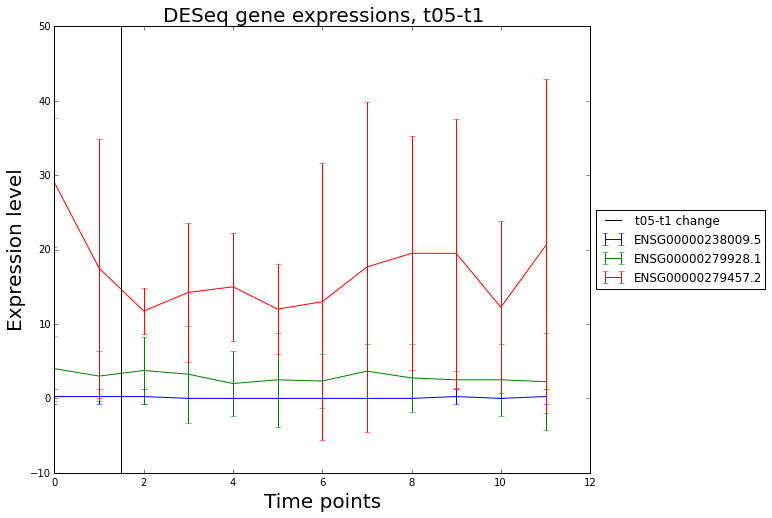

['ENSG00000240618.1', 'ENSG00000228327.2', 'ENSG00000237491.7']


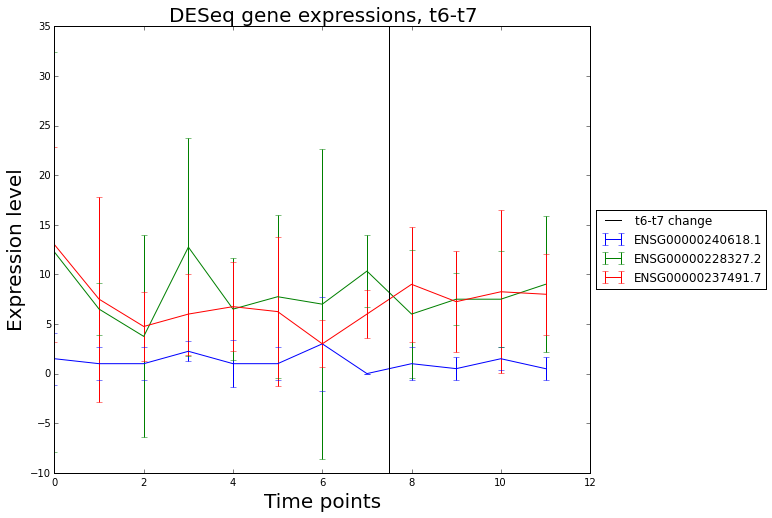

In [21]:
import geneTSmunging as gtm
reload(gtm)
import matplotlib.pyplot as plt
%matplotlib inline

plot_genes = list(degenes)[0:3]
print plot_genes
transition = "t05-t1"
line_color_labels = [(1.5, 'black', transition + " change")]
gtm.plot_genes(de_data,plot_genes, title="DESeq gene expressions, " + transition, line_color_labels=line_color_labels)


plot_genes = list(degenes)[180:183]
print plot_genes
transition = "t6-t7"
line_color_labels = [(7.5, 'black', transition + " change")]
gtm.plot_genes(de_data,plot_genes, title="DESeq gene expressions, " + transition, line_color_labels=line_color_labels)

# edgeR genes

In [23]:
import pandas as pd

all_data = gtm.load_file_and_avg("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited.txt")
result_filenames = ["../data/GeneExpressionData/DESeq-processing/featurecounts.genes.counts.selected_reps-limited-edgeR-pair-" + str(i) + "-out.txt" for i in range(11)]

ergenes = []

for result_filename in result_filenames:
    result = pd.read_csv(result_filename, sep="\t")
    
    print result_filename
    result.head(n=5)
    
    genes = result[result["padj"] < 0.05]["gene"].values
    
    print "Num diff exp genes", len(genes)
    
    ergenes.extend(genes)

['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']
t00 has 4 data points
t05 has 4 data points
t1_ has 4 data points
t2_ has 4 data points
t3_ has 4 data points
t4_ has 4 data points
t5_ has 3 data points
t6_ has 3 data points
t7_ has 4 data points
t8_ has 4 data points
t10_ has 4 data points
t12_ has 4 data points
../data/GeneExpressionData/DESeq-processing/featurecounts.genes.counts.selected_reps-limited-edgeR-pair-0-out.txt
Num diff exp genes 0
../data/GeneExpressionData/DESeq-processing/fea

In [30]:
print "Total differentially expressed genes", len(set(ergenes))
print len(ergenes)

er_data = all_data[all_data["gene"].isin(ergenes)]

Total differentially expressed genes 27
28


['ENSG00000163659.11', 'ENSG00000023445.12', 'ENSG00000117525.12']


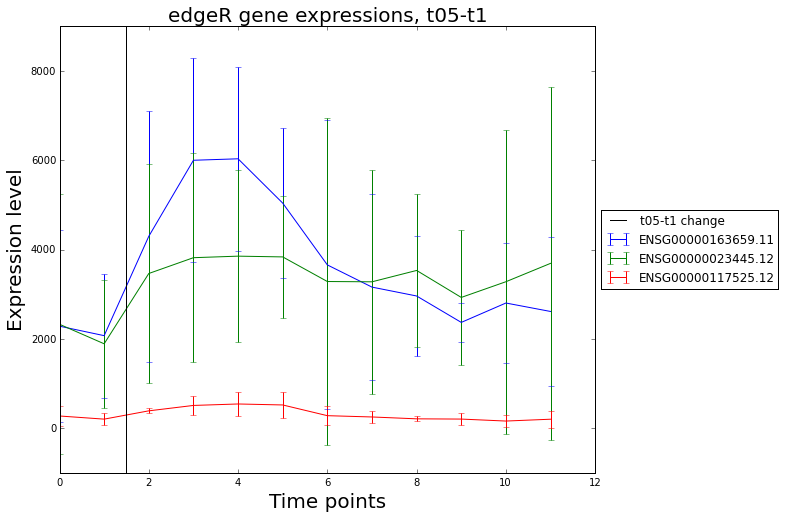

['ENSG00000204389.9', 'ENSG00000174738.11', 'ENSG00000188559.12']


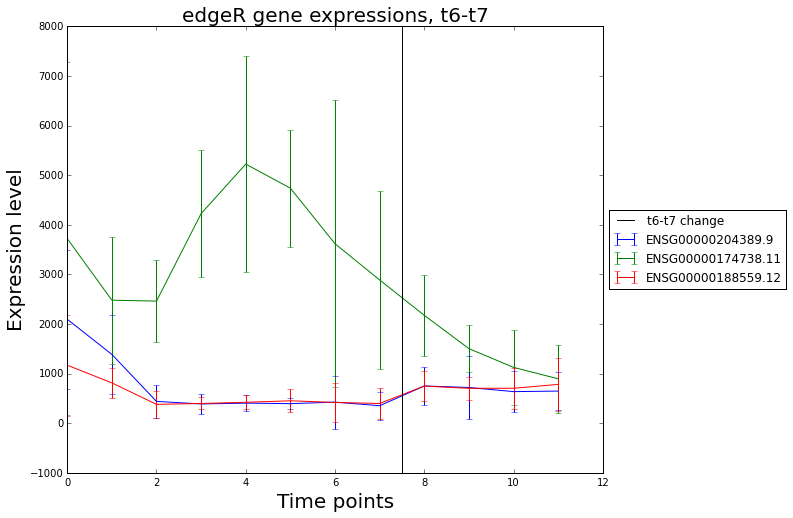

In [31]:
import geneTSmunging as gtm
reload(gtm)
import matplotlib.pyplot as plt
%matplotlib inline

plot_genes = list(ergenes)[0:3]
print plot_genes
transition = "t05-t1"
line_color_labels = [(1.5, 'black', transition + " change")]
gtm.plot_genes(er_data,plot_genes, title="edgeR gene expressions, " + transition, line_color_labels=line_color_labels)


plot_genes = list(ergenes)[25:]
print plot_genes
transition = "t6-t7"
line_color_labels = [(7.5, 'black', transition + " change")]
gtm.plot_genes(er_data,plot_genes, title="edgeR gene expressions, " + transition, line_color_labels=line_color_labels)

# Notes on the interseciton among the two



In [32]:
both_genes = set(degenes).intersection(set(ergenes))
print "Num degenes ", len(set(degenes))
print "Num ergenes ", len(set(ergenes))
print "num both ", len(set(both_genes))

Num degenes  148
Num ergenes  27
num both  1


In [33]:
print both_genes

set(['ENSG00000116285.11'])


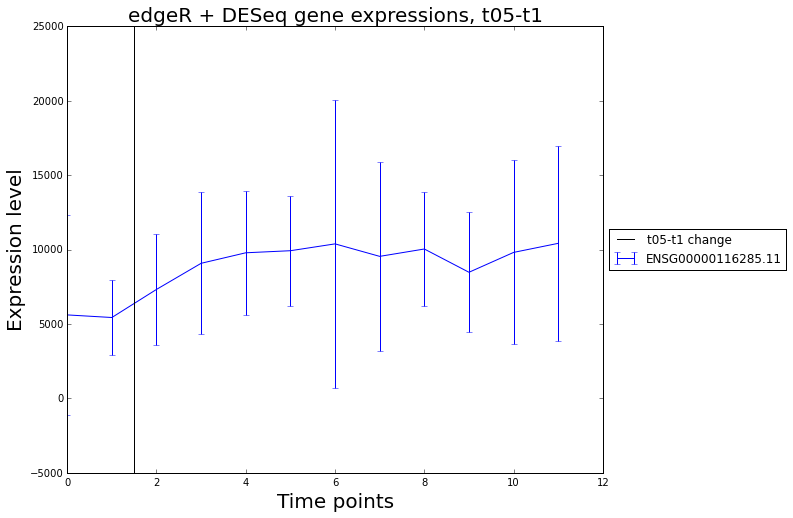

In [34]:

transition = "t05-t1"
line_color_labels = [(1.5, 'black', transition + " change")]
gtm.plot_genes(er_data,list(both_genes), title="edgeR + DESeq gene expressions, " + transition, line_color_labels=line_color_labels)

For t05-51
In edgeR: 0.0328063247540596
In DESeq: 0.0419879677421259

In [40]:
rep_keys = ['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4', 't05_rep1', 't05_rep2', 't05_rep3', 't05_rep4', 't1_rep1', 't1_rep2', 't1_rep3', 't1_rep4', 't2_rep1', 't2_rep2', 't2_rep3', 't2_rep4', 't3_rep1', 't3_rep2', 't3_rep3', 't3_rep4', 't4_rep1', 't4_rep2', 't4_rep3', 't4_rep4', 't5_rep2', 't5_rep3', 't5_rep4', 't6_rep2', 't6_rep3', 't6_rep4', 't7_rep1', 't7_rep2', 't7_rep3', 't7_rep4', 't8_rep1', 't8_rep2', 't8_rep3', 't8_rep4', 't10_rep1', 't10_rep2', 't10_rep3', 't10_rep4', 't12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']

erde_data = all_data[all_data["gene"].isin(degenes + ergenes)][["gene"] + rep_keys]


erde_data.to_csv("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited-diff-exp.txt", sep="\t", index=False)

# geneerate randomized data for diffexp genes

In [41]:

erde_data = gtm.load_file_and_avg("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited-diff-exp.txt")
rand_erde_data = gtm.make_and_save_randomized_data(erde_data, filename="../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited-diff-exp-randomized.txt")

['t00_rep1', 't00_rep2plusextra', 't00_rep3plusextra', 't00_rep4']
['t05_rep1', 't05_rep2', 't05_rep3', 't05_rep4']
['t1_rep1', 't1_rep2', 't1_rep3', 't1_rep4']
['t2_rep1', 't2_rep2', 't2_rep3', 't2_rep4']
['t3_rep1', 't3_rep2', 't3_rep3', 't3_rep4']
['t4_rep1', 't4_rep2', 't4_rep3', 't4_rep4']
['t5_rep2', 't5_rep3', 't5_rep4']
['t6_rep2', 't6_rep3', 't6_rep4']
['t7_rep1', 't7_rep2', 't7_rep3', 't7_rep4']
['t8_rep1', 't8_rep2', 't8_rep3', 't8_rep4']
['t10_rep1', 't10_rep2', 't10_rep3', 't10_rep4']
['t12_rep1', 't12_rep2', 't12_rep3', 't12_rep4']
t00 has 4 data points
t05 has 4 data points
t1_ has 4 data points
t2_ has 4 data points
t3_ has 4 data points
t4_ has 4 data points
t5_ has 3 data points
t6_ has 3 data points
t7_ has 4 data points
t8_ has 4 data points
t10_ has 4 data points
t12_ has 4 data points
Randomized written to  ../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited-diff-exp-randomized.txt


In [43]:
erde_data.describe()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,t00_rep1,t00_rep2plusextra,t00_rep3plusextra,t00_rep4,t05_rep1,t05_rep2,t05_rep3,t05_rep4,t1_rep1,t1_rep2,...,t05-t1_ normal_diff,t1_-t2_ normal_diff,t2_-t3_ normal_diff,t3_-t4_ normal_diff,t4_-t5_ normal_diff,t5_-t6_ normal_diff,t6_-t7_ normal_diff,t7_-t8_ normal_diff,t8_-t10_ normal_diff,t10_-t12_ normal_diff
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,845.971264,1444.419540,1289.189655,1783.965517,754.867816,743.718391,1170.574713,910.925287,666.189655,633.833333,...,-0.708664,0.503222,0.256784,0.276968,-0.021509,0.109566,0.512793,0.017182,0.049315,0.342102
std,3721.827214,6107.481784,5229.325096,6456.413794,3217.948118,3027.118467,4816.136806,3249.929966,2709.002697,2579.567043,...,1.086533,0.804746,0.667627,0.625221,0.782794,0.732296,0.840930,0.756337,0.642337,0.583223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.501064,-2.169305,-1.755803,-1.553347,-2.140196,-2.081425,-2.043049,-1.940505,-1.946247,-1.125810
25%,2.000000,6.000000,5.250000,6.000000,4.000000,3.000000,4.000000,2.000000,1.000000,2.000000,...,-1.478503,0.142174,-0.055190,-0.052077,-0.533834,-0.242185,0.006692,-0.466402,-0.311541,0.034942
50%,86.500000,144.000000,139.000000,164.500000,81.500000,84.000000,137.500000,79.500000,60.000000,59.000000,...,-0.941030,0.582650,0.320106,0.344640,0.004159,0.146855,0.678477,0.132893,0.113958,0.396868
75%,530.250000,871.750000,762.000000,1094.000000,478.500000,488.750000,748.000000,548.500000,378.750000,401.500000,...,-0.133407,0.975090,0.621556,0.570577,0.469353,0.597632,1.092530,0.437620,0.376644,0.666681
max,45311.000000,73340.000000,62148.000000,70216.000000,39806.000000,36975.000000,59143.000000,33861.000000,33286.000000,31766.000000,...,2.494870,2.374298,2.115544,2.237446,2.348636,1.951800,2.119861,2.012602,1.883892,2.087404


# Analyze granger after running over differentially expressed genes

In [48]:
import geneTSmunging as gtm
reload(gtm)
import pickle
import numpy as np
data = gtm.load_file_and_avg("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited-diff-exp.txt")
rand_data = gtm.load_file_and_avg("../data/GeneExpressionData/featurecounts.genes.counts.selected_reps-limited-diff-exp-randomized.txt")


prefixes = ["limited-diff-exp-granger-" + str(i) for i in range(1,4)]
filenames = ["della/"+prefix + "/"  + "limited-granger-" + str(i) + ".p" for prefix, i in zip(prefixes, range(1,4))]
rand_filenames = ["della/"+prefix + "-randomized/" + "limited-granger-" + str(i) + "-randomized.p" for prefix, i in zip(prefixes, range(1,4))]

outputs = []
rand_outputs = []
for filename in filenames:
    with open(filename, 'rU') as outfile:
        outputs.append(pickle.load(outfile))
ps = [output[0] for output in outputs]
betas = [output[1] for output in outputs]
avg_betas = [np.average(beta, axis=2) for beta in betas]
max_betas = [np.max(beta, axis=2) for beta in betas]



for rand_filename in rand_filenames:
    with open(rand_filename, 'rU') as outfile:
        rand_outputs.append(pickle.load(outfile))
    

rand_ps = [output[0] for output in rand_outputs]
rand_betas = [output[1] for output in rand_outputs]

avg_rand_betas = [np.average(rand_beta, axis=2) for rand_beta in rand_betas]
max_rand_betas = [np.max(rand_beta, axis=2) for rand_beta in rand_betas]

sigs = [p < 0.05 for p in ps]
rand_sigs = [p < 0.05 for p in rand_ps]

import numpy as np
some_sig_matr = np.zeros(sigs[0].shape)
some_randsig_matr = np.zeros(rand_sigs[0].shape)
for sig, rand_sig, i in zip(sigs, rand_sigs, range(1, len(sigs) + 1)):
    print sig.shape, some_sig_matr.shape
    some_sig_matr = np.logical_or(sig, some_sig_matr)
    some_randsig_matr = np.logical_or(rand_sig, some_randsig_matr)
    print "model order", i
    print "Number pairs ", sig.ravel().shape
    print "Number sig ", len(np.where(sig)[0])
    print "For random:"
    print "Number pairs ", rand_sig.ravel().shape
    print "Number sig ", len(np.where(rand_sig)[0])
    print "----------------------"

all_sig_matr, all_sig_num, not_sig_num =gtm.compare_sig_matr(sigs)


print "Number of pairs sig for at least one ", len(np.where(some_sig_matr)[0])
print "Number of pairs significant over all ", all_sig_num
print "All Sig Ratio: ", all_sig_num * 1.0 / (all_sig_matr.shape[0] * all_sig_matr.shape[1])

print "For random"

all_rand_sig_matr, all_rand_sig_num, not_rand_sig_num =gtm.compare_sig_matr(rand_sigs)

print "Number of pairs rand_sig for at least one ", len(np.where(some_randsig_matr)[0])
print "Number of pairs rand_significant over all ", all_rand_sig_num
print "All Sig Ratio: ", all_rand_sig_num * 1.0 / (all_rand_sig_matr.shape[0] * all_rand_sig_matr.shape[1])

not_rand_sig_matr = ~ some_randsig_matr

Avg + STD loaded
Fold change loaded
Diff loaded
normalized diff loaded
Avg + STD loaded
Fold change loaded
Diff loaded
normalized diff loaded
(174, 174) (174, 174)
model order 1
Number pairs  (30276,)
Number sig  3580
For random:
Number pairs  (30276,)
Number sig  1774
----------------------
(174, 174) (174, 174)
model order 2
Number pairs  (30276,)
Number sig  2395
For random:
Number pairs  (30276,)
Number sig  1858
----------------------
(174, 174) (174, 174)
model order 3
Number pairs  (30276,)
Number sig  1532
For random:
Number pairs  (30276,)
Number sig  1517
----------------------
Number of pairs sig for at least one  6454
Number of pairs significant over all  83
All Sig Ratio:  0.00274144536927
For random
Number of pairs rand_sig for at least one  4041
Number of pairs rand_significant over all  152
All Sig Ratio:  0.00502047826661


# Write original and threshold matrices, lag 1, t-1

In [50]:
import matplotlib.pyplot as plt

fdr = 0.1
lag = 1
t = 1
index = lag - 1
num = t - 1

prefix = "../data/GeneExpressionData/limited-diff-exp_matrices/Lag-" + str(index + 1) + "_beta-t-" + str(num + 1) + "_"
fdr_file = prefix + "thresh-FDR-" + str(fdr) + ".txt"
matrix_file = prefix + "no-thresh.txt"
rand_matrix_file = prefix + "null.txt"
left_precision_file = prefix + "Left-Precision"
right_precision_file = prefix + "Right-Precision"
readme_file = prefix + "_README.txt"

beta_matr = betas[index][:, :, num]
rand_beta_matr = rand_betas[index][:, :, num]
sig_matr = sigs[index]

genes = data["gene"]
rand_genes = rand_data["gene"]

just_sig_betas = beta_matr[np.where(sigs[index])]

not_rand_just_sig_betas = rand_beta_matr[np.where(np.logical_not(rand_sigs[index]))]


print "Beta Matrix of lag ", index + 1, "and num", num + 1, "saved to ", matrix_file
gtm.save_gene_matrix(matrix=beta_matr, filename=matrix_file, genes=genes)

print "Rand Matrix of lag", index + 1, "and num", num + 1, " saved to ", rand_matrix_file
gtm.save_gene_matrix(matrix=rand_beta_matr, filename=rand_matrix_file, genes=rand_genes)

print "Using original"
print "Trying to have an FDR of ", fdr
print "Taking the ", num + 1, "-th previous timepoint"

from statsmodels.distributions.empirical_distribution import ECDF

sig_cdf = ECDF(just_sig_betas)
not_sig_cdf = ECDF(not_rand_just_sig_betas)


all_betas = np.concatenate((just_sig_betas, not_rand_just_sig_betas))
beta_space = np.sort(all_betas)

left_precisions = [sig_cdf(beta)/(sig_cdf(beta) + not_sig_cdf(beta)) for beta in beta_space]
right_precisions = [(1 - sig_cdf(beta)) / (2.0 - sig_cdf(beta) - not_sig_cdf(beta)) for beta in beta_space]

import os
os.system("say 'finished'")

Beta Matrix of lag  1 and num 1 saved to  ../data/GeneExpressionData/limited-diff-exp_matrices/Lag-1_beta-t-1_no-thresh.txt
Rand Matrix of lag 1 and num 1  saved to  ../data/GeneExpressionData/limited-diff-exp_matrices/Lag-1_beta-t-1_null.txt
Using original
Trying to have an FDR of  0.1
Taking the  1 -th previous timepoint


0

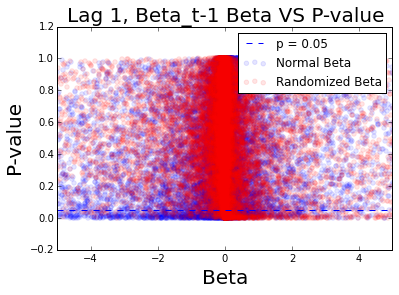

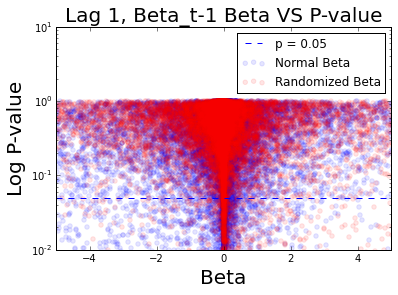

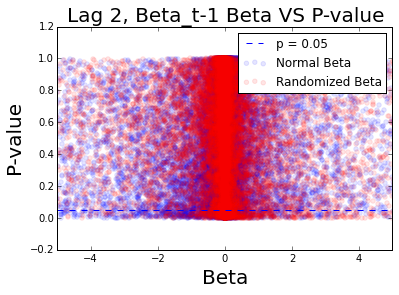

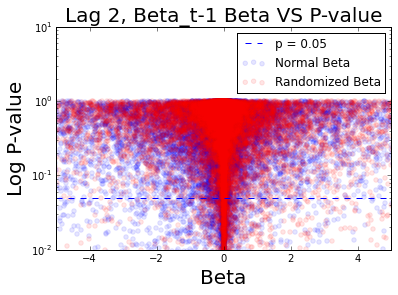

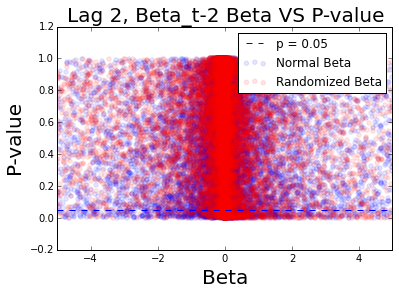

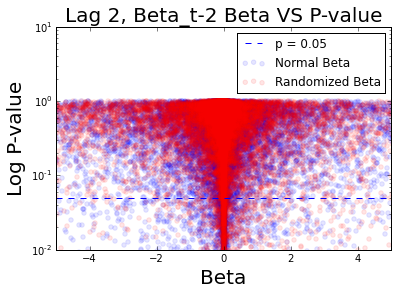

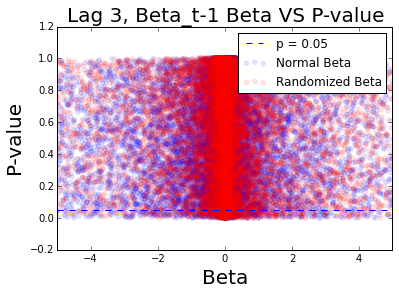

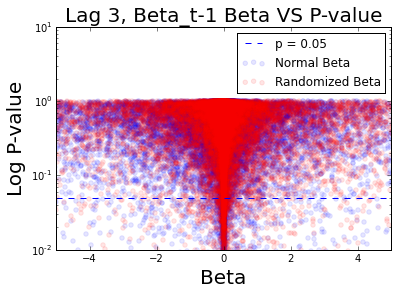

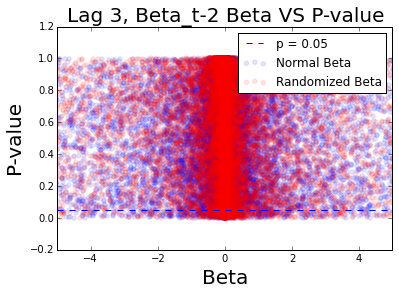

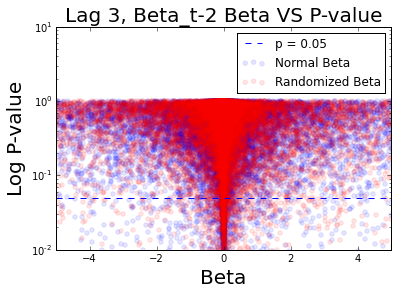

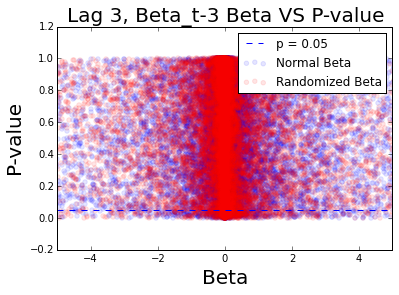

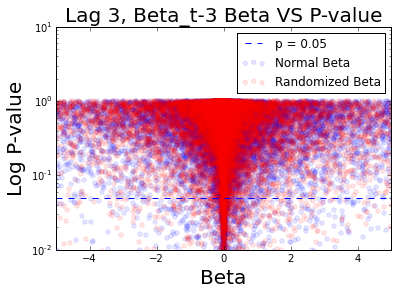

In [67]:
for i, p, rand_p, beta, rand_beta in zip(range(1,4), ps, rand_ps, betas, rand_betas):
    for shape in range(beta.shape[2]):
        beta_slice = beta[:, :, shape]
        rand_beta_slice = rand_beta[:, :, shape]
        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.xlim(-5,5)
        plt.scatter(beta_slice, p, color='blue', alpha=0.1,label="Normal Beta")
        plt.scatter(rand_beta_slice, rand_p, color='red', alpha=0.1,label="Randomized Beta")
        plt.xlabel("Beta", fontsize=20)
        plt.ylabel("P-value", fontsize=20)
        plt.axhline(y=0.05, linestyle="dashed", label="p = 0.05")
        plt.title("Lag "+ str(i) + ", Beta_t-"+ str(shape + 1) + " Beta VS P-value", fontsize=20)
        plt.legend()
        plt.show()
        
        
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.xlim(-5,5)
        plt.scatter(beta_slice, p, color='blue', alpha=0.1,label="Normal Beta")
        plt.scatter(rand_beta_slice, rand_p, color='red', alpha=0.1,label="Randomized Beta")
        plt.xlabel("Beta", fontsize=20)
        plt.ylabel("Log P-value", fontsize=20)
        plt.axhline(y=0.05, linestyle="dashed", label="p = 0.05")
        plt.title("Lag "+ str(i) + ", Beta_t-"+ str(shape + 1) + " Beta VS P-value", fontsize=20)
        ax.set_yscale('log')
        plt.legend()
        plt.show()

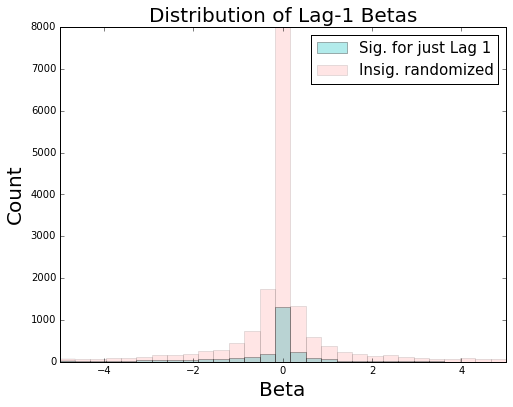

In [60]:
%matplotlib inline
#
xmin = -5
xmax = 5
bins = np.linspace(xmin, xmax, 30)

plt.figure(figsize=(8,6))
plt.xlim(xmin, xmax)
plt.ylim(0,8000)
plt.hist(just_sig_betas, bins=bins, alpha=0.3, label="Sig. for just Lag 1", color='c')
plt.hist(not_rand_just_sig_betas, bins=bins, alpha=0.1, label="Insig. randomized", color='r')
# plt.axvline(x=bottom_threshold, color='k', linestyle='dashed', label="Threshold")
# plt.axvline(x=top_threshold, color='k', linestyle='dashed', label="Threshold")
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.legend(loc="best", fontsize=15)
plt.title("Distribution of Lag-1 Betas", fontsize=20)
plt.show()


# fdr = 0.1

# print "FDR at ", fdr, "is at "




Plot saved to  ../data/GeneExpressionData/limited-diff-exp_matrices/Lag-1_beta-t-1_Right-Precision


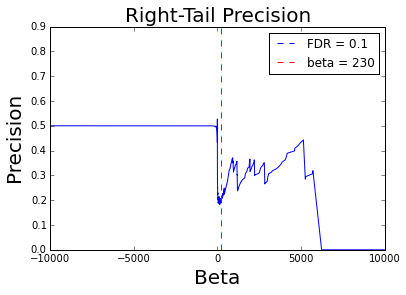

In [55]:
import matplotlib.pyplot as plt


right_xmin = -10000
right_xmax = 10000
right_threshold = 230

fig = plt.figure()
plt.plot(beta_space, right_precisions)
plt.xlim(right_xmin,right_xmax)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=right_threshold, color = 'red', linestyle='dashed', label="beta = " + str(right_threshold))
plt.title("Right-Tail Precision", fontsize=20)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.legend(loc='best')
fig.savefig(right_precision_file)
print "Plot saved to ", right_precision_file
plt.show()

# Write original and threshold matrices, lag 2, t-1

In [68]:
import matplotlib.pyplot as plt

fdr = 0.1
lag = 2
t = 1
index = lag - 1
num = t - 1

prefix = "../data/GeneExpressionData/limited-diff-exp_matrices/Lag-" + str(index + 1) + "_beta-t-" + str(num + 1) + "_"
fdr_file = prefix + "thresh-FDR-" + str(fdr) + ".txt"
matrix_file = prefix + "no-thresh.txt"
rand_matrix_file = prefix + "null.txt"
left_precision_file = prefix + "Left-Precision"
right_precision_file = prefix + "Right-Precision"
readme_file = prefix + "_README.txt"

beta_matr = betas[index][:, :, num]
rand_beta_matr = rand_betas[index][:, :, num]
sig_matr = sigs[index]

genes = data["gene"]
rand_genes = rand_data["gene"]

just_sig_betas = beta_matr[np.where(sigs[index])]

not_rand_just_sig_betas = rand_beta_matr[np.where(np.logical_not(rand_sigs[index]))]


print "Beta Matrix of lag ", index + 1, "and num", num + 1, "saved to ", matrix_file
gtm.save_gene_matrix(matrix=beta_matr, filename=matrix_file, genes=genes)

print "Rand Matrix of lag", index + 1, "and num", num + 1, " saved to ", rand_matrix_file
gtm.save_gene_matrix(matrix=rand_beta_matr, filename=rand_matrix_file, genes=rand_genes)

print "Using original"
print "Trying to have an FDR of ", fdr
print "Taking the ", num + 1, "-th previous timepoint"

from statsmodels.distributions.empirical_distribution import ECDF

sig_cdf = ECDF(just_sig_betas)
not_sig_cdf = ECDF(not_rand_just_sig_betas)


all_betas = np.concatenate((just_sig_betas, not_rand_just_sig_betas))
beta_space = np.sort(all_betas)

left_precisions = [sig_cdf(beta)/(sig_cdf(beta) + not_sig_cdf(beta)) for beta in beta_space]
right_precisions = [(1 - sig_cdf(beta)) / (2.0 - sig_cdf(beta) - not_sig_cdf(beta)) for beta in beta_space]

import os
os.system("say 'finished'")

Beta Matrix of lag  2 and num 1 saved to  ../data/GeneExpressionData/limited-diff-exp_matrices/Lag-2_beta-t-1_no-thresh.txt
Rand Matrix of lag 2 and num 1  saved to  ../data/GeneExpressionData/limited-diff-exp_matrices/Lag-2_beta-t-1_null.txt
Using original
Trying to have an FDR of  0.1
Taking the  1 -th previous timepoint


0

Plot saved to  ../data/GeneExpressionData/limited-diff-exp_matrices/Lag-2_beta-t-1_Right-Precision


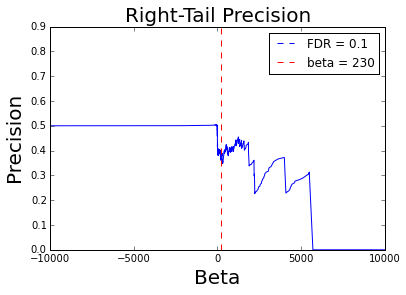

In [69]:
import matplotlib.pyplot as plt


right_xmin = -10000
right_xmax = 10000
right_threshold = 230

fig = plt.figure()
plt.plot(beta_space, right_precisions)
plt.xlim(right_xmin,right_xmax)
plt.axhline(y=1 - fdr, linestyle='dashed', label="FDR = " + str(fdr))
plt.axvline(x=right_threshold, color = 'red', linestyle='dashed', label="beta = " + str(right_threshold))
plt.title("Right-Tail Precision", fontsize=20)
plt.xlabel("Beta", fontsize=20)
plt.ylabel("Precision", fontsize=20)
plt.legend(loc='best')
fig.savefig(right_precision_file)
print "Plot saved to ", right_precision_file
plt.show()